# Logistic Regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
pcf,PEG_trailing,dpr,npm,gpm,roa,roe,capital_ratio,de_ratio,cash_ratio,curr_ratio,inv_turn,pay_turn,sale_nwc,rd_sale,accrual,
gdpr1,gdpr2,cpi,bond20yr,bond30yr,fedfunds,cpir,wpir,unemp,employ,
SMA,EMA,STOCH_k,STOCK_d,RSI,MFI,SAR,AD,SPY,NDAQ
tech_list = []
funda_list = []
macro_list = []

## Taking the AAPL for example to investigate the effect

In [37]:
freq = 'Daily'
stock = 'AAPL'
price = pd.read_csv('../encode_price/'+freq+'/'+stock+'.csv')
y = price.direction.shift(-1).values[:-1]
predictors = pd.read_csv('../predictors/Tech/'+freq+'/'+stock+'.csv',index_col='Date')
predictors['Y_lag1'] = price.direction.values[::-1]
predictors.fillna(0,inplace=True)

In [38]:
X = predictors.values[:-1,]
X.shape

(2536, 11)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,zero_one_loss,recall_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,shuffle=False)


## SMOTE Balanced Dataset

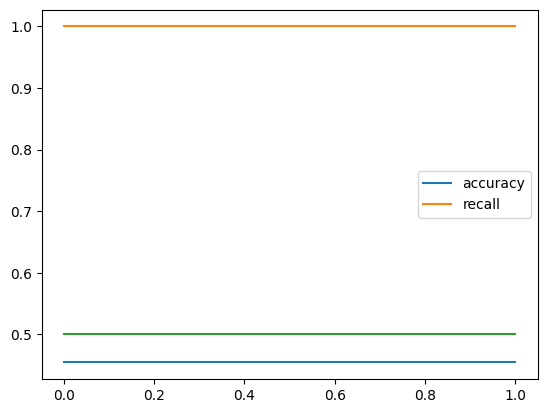

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.55      0.71       634

    accuracy                           0.55       634
   macro avg       0.50      0.27      0.35       634
weighted avg       1.00      0.55      0.71       634



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [50]:
result1 = []
result2 = []
u = 1
l = 0.001 
for i in np.linspace(l,u,50):
    sm = SMOTE(sampling_strategy='minority',random_state=42,k_neighbors=1)
    X_res,y_res = sm.fit_resample(X_train,y_train)
    pipe = make_pipeline(MinMaxScaler(),LogisticRegression(C=i,penalty = 'l1',solver='liblinear'))
    pipe.fit(X_res,y_res)
    y_pred = pipe.predict(X_test)
    # print(classification_report(y_test,y_pred))
    accuracy = zero_one_loss(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    result1.append(accuracy)
    result2.append(recall)

plt.plot(np.linspace(l,u,50),result1,label = 'accuracy')
plt.plot(np.linspace(l,u,50),result2,label = 'recall')
plt.legend()
plt.plot(np.linspace(l,u,50),[0.5]*(50))
plt.show()
print(classification_report(y_pred,y_test))

## Original Dataset

In [48]:
pipe = make_pipeline(MinMaxScaler(),LogisticRegression(dual=True,penalty = 'l2',solver='liblinear'))
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       288
         1.0       0.55      1.00      0.71       346

    accuracy                           0.55       634
   macro avg       0.27      0.50      0.35       634
weighted avg       0.30      0.55      0.39       634



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.